importing model with surfactin

In [1]:
%run model.ipynb

In [2]:
import numpy as np

In [3]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.DM_surfactin_c)
df = result.data_frame

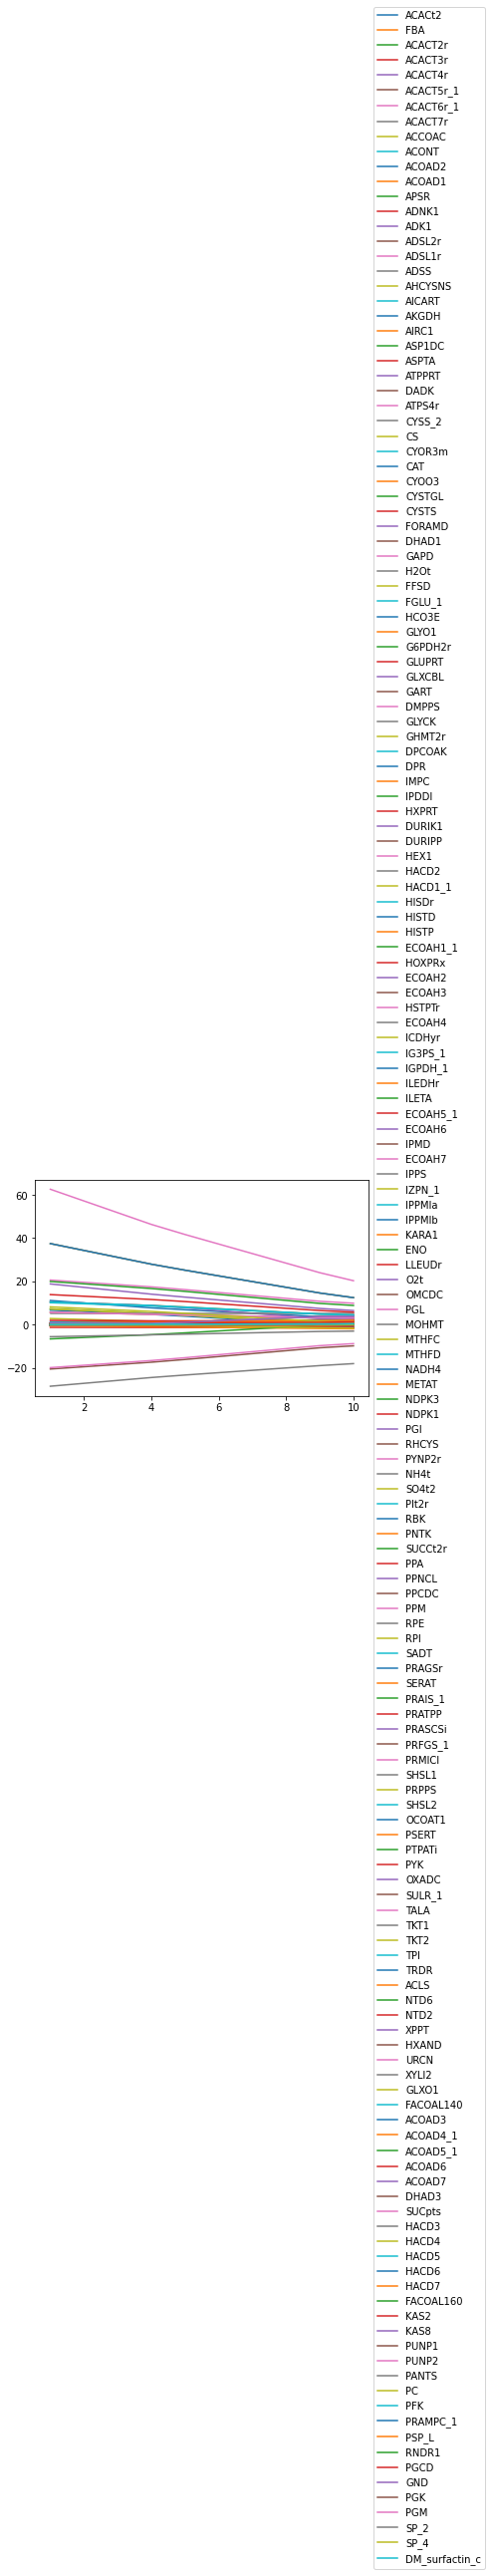

In [4]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
# sorting 
df= df.sort_values([1], ascending = False)
 
from pytest import approx
# removing genes from dataframe 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
PGL,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866
G6PDH2r,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866
GND,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866
ACOAD7,0.301982,0.251996,0.202011,0.152025,0.160714,0.192857,0.225000,0.257143,0.289286,-0.000000
TKT1,0.194107,0.174909,0.155712,0.136514,0.287176,0.497661,0.708145,0.918630,1.129114,1.064783


ValueError: Invalid color ['green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green' 'green'
 'green' 'green' 'green' 'green' 'green' 'green' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']

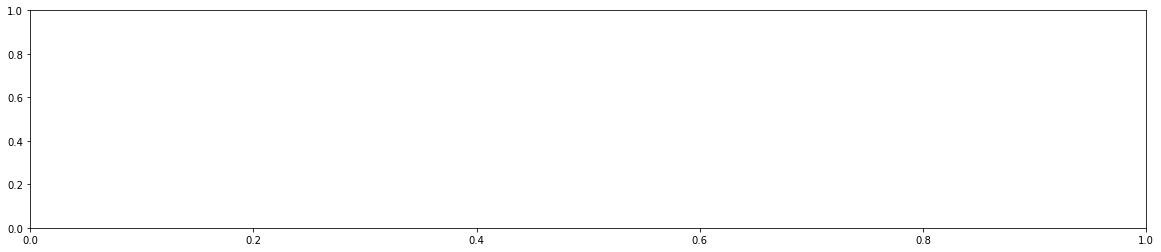

In [15]:
def bar_color(df,color1,color2):
    return np.where(df.values >=0,color1,color2).T

fig = df1.plot(legend=None, kind='bar', color=bar_color(df,'green','red'),figsize=(20, 4), grid =False);
fig.set_ylabel('Change in flux')
fig.set_xlabel('Gene names')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [16]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1

In [17]:
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [18]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
PGL,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
G6PDH2r,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
GND,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
ACOAD7,0.301982,0.251996,0.202011,0.152025,0.160714,0.192857,0.225000,0.257143,0.289286,-0.000000,inf
TKT1,0.194107,0.174909,0.155712,0.136514,0.287176,0.497661,0.708145,0.918630,1.129114,1.064783,1.817703
TALA,0.194107,0.174909,0.155712,0.136514,0.287176,0.497661,0.708145,0.918630,1.129114,1.064783,1.817703
RPE,0.194107,0.174909,0.155712,0.136514,0.457035,0.897201,1.337368,1.777534,2.217701,2.108236,1.907929
PNTK,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,1.900000
DPR,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,1.900000
PPNCL,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,1.900000


In [10]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

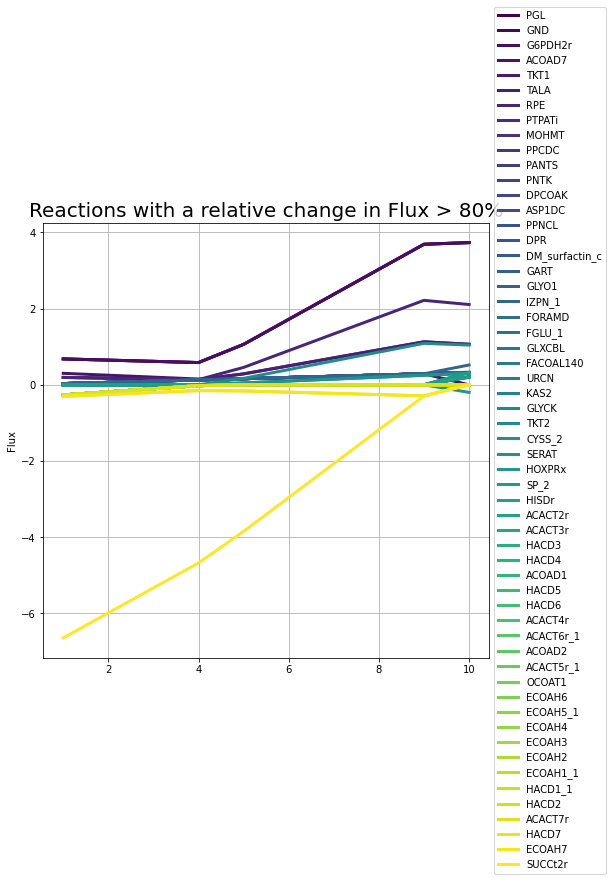

In [11]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [12]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
HACD2,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.0,inf
ACACT7r,-0.269839,-0.187710,-0.105582,-0.023454,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,inf
HACD7,-0.301982,-0.251996,-0.202011,-0.152025,-0.160714,-0.192857,-0.225000,-0.257143,-0.289286,0.0,inf
ECOAH7,-0.301982,-0.251996,-0.202011,-0.152025,-0.160714,-0.192857,-0.225000,-0.257143,-0.289286,0.0,inf
SUCCt2r,-6.645558,-5.989211,-5.332865,-4.676519,-3.849059,-2.960066,-2.071073,-1.182080,-0.293086,0.0,inf


In [13]:
#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
PGL,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
GND,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
G6PDH2r,0.680228,0.648274,0.616321,0.584367,1.061991,1.719083,2.376175,3.033267,3.690359,3.733866,1.817822
ACOAD7,0.301982,0.251996,0.202011,0.152025,0.160714,0.192857,0.225000,0.257143,0.289286,-0.000000,inf
TKT1,0.194107,0.174909,0.155712,0.136514,0.287176,0.497661,0.708145,0.918630,1.129114,1.064783,1.817703
